# Linear Regression


linear model to predict the price of a car 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing DataSet

In [2]:
#loading the data into pandas dataframe object
path='./auto.csv'
df=pd.read_csv(path,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Wrangling

In [3]:
#renaming the columns 
column=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=column
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
#replacing '?' with NaN
df.replace('?',np.nan,inplace=True)

In [6]:
#counting the number of NaN values in each column
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
#droping the rows in which price is NaN because it is what we want to predict and we 
#can not train our model on assumed values
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)

In [8]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
#changing the data-type of from object to float type 
df['normalized-losses']=df['normalized-losses'].astype(float)
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['price']=df['price'].astype(int)

Text(0.5, 1.0, 'Skewedness of normalized-losses data')

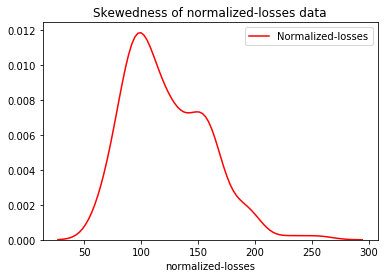

In [10]:
#ploting the distplot to check weather it is negative,positive or symmetric skewed
sns.distplot(df['normalized-losses'],hist=False,color='r',label='Normalized-losses')
plt.title("Skewedness of normalized-losses data")

In [11]:
#replacing the nan values of normalized-losses with its mean as it is almost symmetric skewed
normalized_mean=df['normalized-losses'].mean()
df['normalized-losses'].replace(np.nan,normalized_mean,inplace=True)

In [12]:
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [13]:
#replacing the nan values of num-of-doors with four as it frequency is high 
df['num-of-doors'].replace(np.nan,'four',inplace=True)
df['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

Text(0.5, 1.0, 'Skewedness of bore data ')

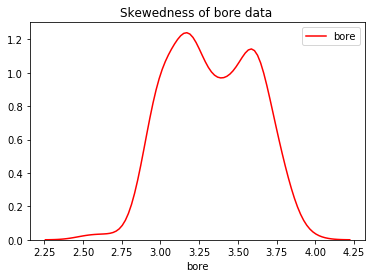

In [14]:
#ploting the distplot to check weather it is negative,positive or symmetric skewed
sns.distplot(df['bore'],hist=False,color='r',label='bore')
plt.title("Skewedness of bore data ")

In [15]:
#replacing the nan values of bore with its mean as it is almost symmetric skewed
bore_mean=df['bore'].mean()
df['bore'].replace(np.nan,bore_mean,inplace=True)

Text(0.5, 1.0, 'Skewedness of stroke data')

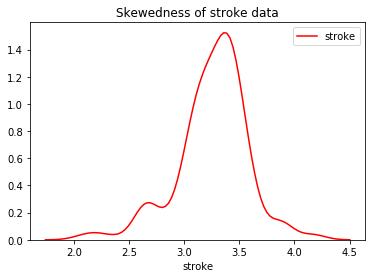

In [16]:
#ploting the distplot to check weather it is negative,positive or symmetric skewed
sns.distplot(df['stroke'],hist=False,color='r',label='stroke')
plt.title("Skewedness of stroke data")

In [17]:
#replacing the nan values of stroke with its mean as it is almost symmetric skewed
stroke_mean=df['stroke'].mean()
df['stroke'].replace(np.nan,stroke_mean,inplace=True)

Text(0.5, 1.0, 'Skewedness of horsepower data')

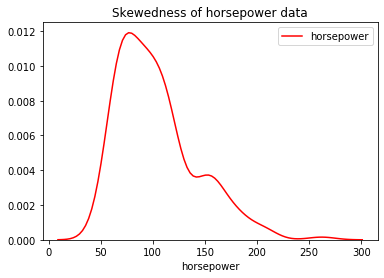

In [18]:
#ploting the distplot to check weather it is negative,positive or symmetric skewed
sns.distplot(df['horsepower'],hist=False,color='r',label='horsepower')
plt.title("Skewedness of horsepower data")

In [19]:
#replacing the nan values of horsepower with its mean as it is almost symmetric skewed
horsepower_mean=df['horsepower'].mean()
df['horsepower'].replace(np.nan,horsepower_mean,inplace=True)

Text(0.5, 1.0, 'Skewedness of peak-rpm data')

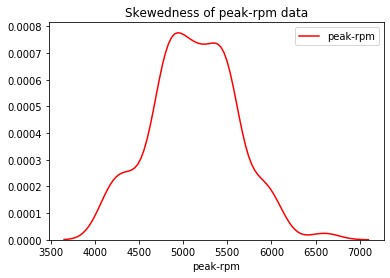

In [20]:
#ploting the distplot to check weather it is negative,positive or symmetric skewed
sns.distplot(df['peak-rpm'],hist=False,color='r',label='peak-rpm')
plt.title("Skewedness of peak-rpm data")

In [21]:
#replacing the nan values of peak-rpm with its mean as it is almost symmetric skewed
peak_rpm_mean=df['peak-rpm'].mean()
df['peak-rpm'].replace(np.nan,peak_rpm_mean,inplace=True)

In [22]:
#all nan values are replaced
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Data Featuring

In [23]:
#applying feature scaling
df['city-L/100km']=235/df['city-mpg']
df['highway-L/100km']=235/df['highway-mpg']

In [24]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km'],
      dtype='object')

In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,10.681818


In [26]:
#applying feature scaling
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [27]:
df['horsepower']=df['horsepower'].astype(int,copy=True)

In [28]:
#binning the hoursepower
bins=np.linspace(min(df['horsepower']),max(df['horsepower']),4)
print(bins)
group_name=['low','medium','high']
df['horsepower-binned']=pd.cut(df['horsepower'],bins,labels=group_name,include_lowest=True)
df['horsepower-binned'].head()

[ 48.         119.33333333 190.66666667 262.        ]


0       low
1       low
2    medium
3       low
4       low
Name: horsepower-binned, dtype: category
Categories (3, object): [low < medium < high]

Text(0.5, 1.0, 'hoursepower counts')

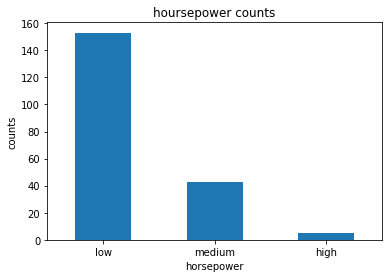

In [29]:
df['horsepower-binned'].value_counts().plot(kind='bar',rot=-360)
plt.xlabel('horsepower')
plt.ylabel('counts')
plt.title("hoursepower counts")

In [30]:
# mapping the unique values of different column to an identity and finding their correlation with 
# price as they will be the good predictor or not

In [31]:
#types of fuel
df['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [32]:
#mapping the unique values to an identity
fuel_type_dict=dict(zip(['gas','diesel'],[1,2]))
df['fuel_type_identity']=df['fuel-type'].map(fuel_type_dict)

In [33]:
df[['fuel-type','fuel_type_identity']]

,fuel-type,fuel_type_identity
0,gas,1
1,gas,1
2,gas,1
3,gas,1
4,gas,1
...,...,...
196,gas,1
197,gas,1
198,gas,1
199,diesel,2


In [34]:
#droping the fuel-type column
df.drop('fuel-type',axis=1,inplace=True)

In [35]:
df['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [36]:
aspiration_dict=dict(zip(['std','turbo'],[1,2]))
df['aspiration_identity']=df['aspiration'].map(aspiration_dict)

In [37]:
df[['aspiration','aspiration_identity']]

,aspiration,aspiration_identity
0,std,1
1,std,1
2,std,1
3,std,1
4,std,1
...,...,...
196,std,1
197,turbo,2
198,std,1
199,turbo,2


In [38]:
df.drop('aspiration',axis=1,inplace=True)

In [39]:
make_name=df.make.unique()
make_name

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [40]:
make_range=pd.Series(list(range(1,23)))
make_dict=dict(zip(make_name,make_range))
df['make_identity']=df['make'].map(make_dict)

In [41]:
df[['make','make_identity']]

,make,make_identity
0,alfa-romero,1
1,alfa-romero,1
2,alfa-romero,1
3,audi,2
4,audi,2
...,...,...
196,volvo,22
197,volvo,22
198,volvo,22
199,volvo,22


In [42]:
df['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

In [43]:
door_dict=dict(zip(['four','two'],[1,2]))
df['door_identity']=df['num-of-doors'].map(door_dict)

In [44]:
df[['num-of-doors','door_identity']]

,num-of-doors,door_identity
0,two,2
1,two,2
2,two,2
3,four,1
4,four,1
...,...,...
196,four,1
197,four,1
198,four,1
199,four,1


In [45]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [46]:
drive_wheels_dict=dict(zip(['fwd','rwd','4wd'],[1,2,3]))
df['drive_wheels_identity']=df['drive-wheels'].map(drive_wheels_dict)

In [47]:
df['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [48]:
engine_location_dict=dict(zip(['front','rear'],[1,2]))
df['engine_location_identity']=df['engine-location'].map(engine_location_dict)

In [49]:
df['num-of-cylinders'].value_counts()

four      157
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [50]:
cylinder_dict=dict(zip(df['num-of-cylinders'].unique(),list(range(1,8))))
df['cylinders_identity']=df['num-of-cylinders'].map(cylinder_dict)

In [51]:
df['engine-type'].nunique()

6

In [52]:
engine_dict=dict(zip(df['engine-type'].unique(),list(range(1,7))))
df['engine_identity']=df['engine-type'].map(engine_dict)

In [53]:
df['fuel-system'].value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64

In [54]:
fuel_system_dict=dict(zip(df['fuel-system'].unique(),list(range(1,9))))
df['fuel_system_identity']=df['fuel-system'].map(fuel_system_dict)

# Data Analysis and Data Visualization

Text(0.5, 1.0, 'door_identity vs price')

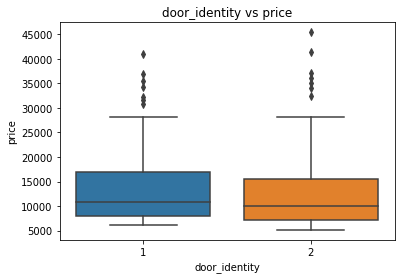

In [55]:
#drawing boxplot to see weather door_identity is a good predictor of price or not
sns.boxplot(x='door_identity',y='price',data=df)
plt.title("door_identity vs price")

this box plot shows that door identity doesn't form a good relation with the price

Text(0.5, 1.0, 'body-style vs price')

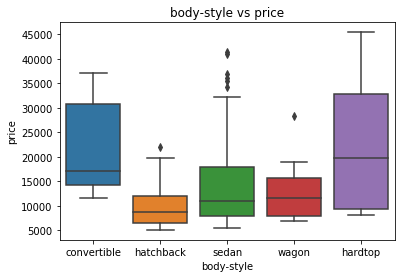

In [56]:
#drawing boxplot to see weather body-style is a good predictor of price or not
sns.boxplot(x='body-style',y='price',data=df)
plt.title("body-style vs price")

the box plot shows that body style doesn't have a pretty good relationship with the price

Text(0.5, 1.0, 'drive_wheels_identiity vs price')

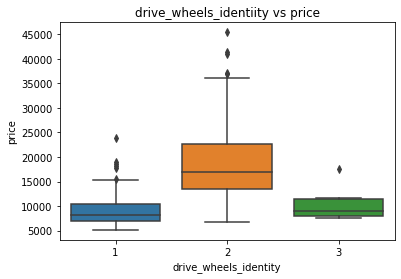

In [57]:
sns.boxplot(x='drive_wheels_identity',y='price',data=df)
plt.title("drive_wheels_identiity vs price")

the above box plot shows that drive_wheels has a pretty good relationship with the price

Text(0.5, 1.0, 'engine_location_identity vs price')

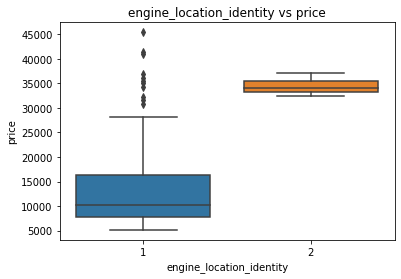

In [58]:
sns.boxplot(x='engine_location_identity',y='price',data=df)
plt.title("engine_location_identity vs price")

the box plot shows that engine location doesn't have effect on price as most engine location is front

Text(0.5, 1.0, 'num-of-cylinders vs price')

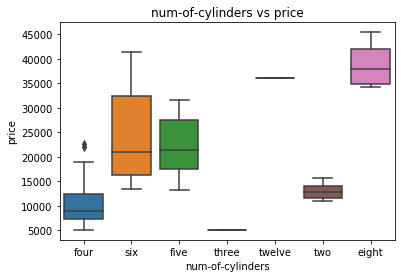

In [59]:
sns.boxplot(x='num-of-cylinders',y='price',data=df)
plt.title("num-of-cylinders vs price")

the boxplot shows that number of cylinders has a acceptable relationship with price

Text(0.5, 1.0, 'engine_identity vs price')

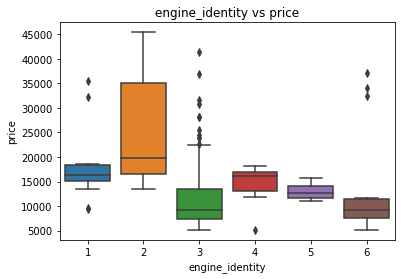

In [60]:
sns.boxplot(x='engine_identity',y='price',data=df)
plt.title("engine_identity vs price")

above box plot shows that engine_identity doesn't have a good relationship with price

Text(0.5, 1.0, 'fuel-system vs price')

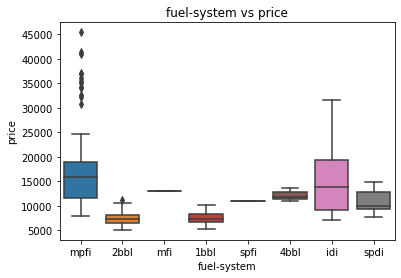

In [61]:
sns.boxplot(x='fuel-system',y='price',data=df)
plt.title("fuel-system vs price")

the above box plot shows fuel-system doesn't have a good relation with price

Text(0.5, 1.0, 'symboling vs price')

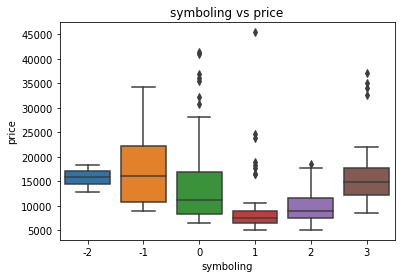

In [62]:
sns.boxplot(x='symboling',y='price',data=df)
plt.title("symboling vs price")

symboling has no relation with price

In [68]:
# finding the correlation of price will all other attributes
df.corr()

,symboling,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel_type_identity,aspiration_identity,make_identity,door_identity,drive_wheels_identity,engine_location_identity,cylinders_identity,engine_identity
symboling,1.000000,-0.535987,-0.365404,-0.242423,-0.233118,-0.110581,-0.139896,0.075776,0.279719,-0.082391,0.066171,-0.029807,-0.196735,-0.054615,-0.129645,0.672344,-0.107764,0.212339,0.106653,0.013134
wheel-base,-0.535987,1.000000,0.876024,0.814507,0.782097,0.572027,0.493203,0.371297,-0.360233,0.584642,0.476153,0.577576,0.307237,0.256889,0.073930,-0.445245,0.369398,-0.189115,0.281960,-0.141121
length,-0.365404,0.876024,1.000000,0.857170,0.880665,0.685025,0.608941,0.579688,-0.286035,0.690628,0.657373,0.707108,0.211187,0.230085,0.110468,-0.395122,0.413710,-0.053086,0.311345,-0.184012
width,-0.242423,0.814507,0.857170,1.000000,0.866201,0.729436,0.544879,0.614972,-0.245852,0.751265,0.673363,0.736728,0.244356,0.305732,-0.005115,-0.227655,0.361280,-0.052205,0.470501,-0.161470
curb-weight,-0.233118,0.782097,0.880665,0.866201,1.000000,0.849072,0.644041,0.758001,-0.279350,0.834415,0.785353,0.836921,0.221046,0.321955,0.017115,-0.208517,0.566305,0.051287,0.434618,-0.203602
engine-size,-0.110581,0.572027,0.685025,0.729436,0.849072,1.000000,0.572516,0.822636,-0.256753,0.872335,0.745059,0.783465,0.070779,0.110040,-0.084770,-0.024094,0.407522,0.199367,0.491009,-0.276419
bore,-0.139896,0.493203,0.608941,0.544879,0.644041,0.572516,1.000000,0.566786,-0.267338,0.543154,0.554726,0.559197,0.054435,0.227782,0.236765,-0.119140,0.525749,0.188404,0.143076,0.233017
horsepower,0.075776,0.371297,0.579688,0.614972,0.758001,0.822636,0.566786,1.000000,0.107882,0.809729,0.889454,0.840695,-0.168941,0.251284,-0.064661,0.102841,0.433974,0.342159,0.433441,-0.205750
peak-rpm,0.279719,-0.360233,-0.286035,-0.245852,-0.279350,-0.256753,-0.267338,0.107882,1.000000,-0.101542,0.115813,0.017736,-0.475759,-0.189982,-0.213009,0.232031,-0.156806,0.201937,0.038157,-0.080174
price,-0.082391,0.584642,0.690628,0.751265,0.834415,0.872335,0.543154,0.809729,-0.101542,1.000000,0.789898,0.801118,0.110326,0.179578,-0.163646,-0.042435,0.486829,0.331062,0.580330,-0.139708


In [63]:
#droping all columns which doesn't form a good correlation with the price
df.drop("num-of-doors",axis=1,inplace=True)
df.drop('engine-location',axis=1,inplace=True)
df.drop('drive-wheels',axis=1,inplace=True)
df.drop('engine-type',axis=1,inplace=True)
df.drop('num-of-cylinders',axis=1,inplace=True)
df.drop('make',axis=1,inplace=True)
df.drop('body-style',axis=1,inplace=True)

In [64]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,fuel-system,bore,...,horsepower-binned,fuel_type_identity,aspiration_identity,make_identity,door_identity,drive_wheels_identity,engine_location_identity,cylinders_identity,engine_identity,fuel_system_identity
0,3,122.0,88.6,0.811148,0.890278,0.816054,2548,130,mpfi,3.47,...,low,1,1,1,2,2,1,1,1,1
1,3,122.0,88.6,0.811148,0.890278,0.816054,2548,130,mpfi,3.47,...,low,1,1,1,2,2,1,1,1,1
2,1,122.0,94.5,0.822681,0.909722,0.876254,2823,152,mpfi,2.68,...,medium,1,1,1,2,2,1,2,2,1
3,2,164.0,99.8,0.848630,0.919444,0.908027,2337,109,mpfi,3.19,...,low,1,1,2,1,1,1,1,3,1
4,2,164.0,99.4,0.848630,0.922222,0.908027,2824,136,mpfi,3.19,...,low,1,1,2,1,3,1,3,3,1


In [65]:
df.drop(df[['stroke','compression-ratio']],axis=1,inplace=True)
df.drop('fuel-system',axis=1,inplace=True)
df.drop('fuel_system_identity',axis=1,inplace=True)
df.drop('normalized-losses',axis=1,inplace=True)
df.drop('height',axis=1,inplace=True)
df.drop(df[['city-mpg','highway-mpg']],axis=1,inplace=True)

In [66]:
df.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'curb-weight',
       'engine-size', 'bore', 'horsepower', 'peak-rpm', 'price',
       'city-L/100km', 'highway-L/100km', 'horsepower-binned',
       'fuel_type_identity', 'aspiration_identity', 'make_identity',
       'door_identity', 'drive_wheels_identity', 'engine_location_identity',
       'cylinders_identity', 'engine_identity'],
      dtype='object')

In [67]:
df.head()

,symboling,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,peak-rpm,price,...,highway-L/100km,horsepower-binned,fuel_type_identity,aspiration_identity,make_identity,door_identity,drive_wheels_identity,engine_location_identity,cylinders_identity,engine_identity
0,3,88.6,0.811148,0.890278,2548,130,3.47,111,5000.0,13495,...,8.703704,low,1,1,1,2,2,1,1,1
1,3,88.6,0.811148,0.890278,2548,130,3.47,111,5000.0,16500,...,8.703704,low,1,1,1,2,2,1,1,1
2,1,94.5,0.822681,0.909722,2823,152,2.68,154,5000.0,16500,...,9.038462,medium,1,1,1,2,2,1,2,2
3,2,99.8,0.848630,0.919444,2337,109,3.19,102,5500.0,13950,...,7.833333,low,1,1,2,1,1,1,1,3
4,2,99.4,0.848630,0.922222,2824,136,3.19,115,5500.0,17450,...,10.681818,low,1,1,2,1,3,1,3,3


In [69]:
df.drop(df[['engine_identity','engine_location_identity','drive_wheels_identity','door_identity','make_identity','aspiration_identity','fuel_type_identity']],axis=1,inplace=True)

In [70]:
#saving the file as cleaned_data.csv
df.to_csv('./cleaned_data.csv',index=False)